In [ ]:
                    Calculating Cumulative portfolio returns in Python using Yahoo Data Finance
Cumulative returns is an important concept related to returns which is defined as the returns over a time period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
#  chose the Assets to be included in the portfolio
tickers = ['BND', 'VB', 'VEA', 'VOO', 'VWO']

In [3]:
# create a vector for asset weights
wts = [0.1,0.2,0.25,0.25,0.2]

In [4]:
#download the price data from yahoo finance
price_data = web.get_data_yahoo(tickers,
                               start = '2013-01-01',
                               end = '2018-03-01')

In [5]:
#get Data from ADJ close column
price_data = price_data['Adj Close']

In [39]:
print(price_data.head())

Symbols           BND         VB        VEA         VOO        VWO
Date                                                              
2013-01-02  69.644707  75.528328  29.225330  116.686630  37.870014
2013-01-03  69.437263  75.482918  28.931528  116.581810  37.645142
2013-01-04  69.545097  76.054886  29.094755  117.070915  37.711773
2013-01-07  69.495316  75.827942  28.947853  116.756500  37.386955
2013-01-08  69.561745  75.682663  28.792793  116.407166  37.078793


In [21]:
#Calculate the daily returns for the assets
ret_data = price_data.pct_change()[1:]

In [40]:
print(ret_data.head())

Symbols          BND        VB       VEA       VOO       VWO
Date                                                        
2013-01-03 -0.002979 -0.000601 -0.010053 -0.000898 -0.005938
2013-01-04  0.001553  0.007577  0.005642  0.004195  0.001770
2013-01-07 -0.000716 -0.002984 -0.005049 -0.002686 -0.008613
2013-01-08  0.000956 -0.001916 -0.005357 -0.002992 -0.008243
2013-01-09 -0.000358  0.004318  0.004818  0.003001  0.005840


In [41]:
#Calculate the weighted returns for the assets
weighted_returns = (wts * ret_data)
print(weighted_returns.head())

Symbols          BND        VB       VEA       VOO       VWO
Date                                                        
2013-01-03 -0.000298 -0.000120 -0.002513 -0.000225 -0.001188
2013-01-04  0.000155  0.001515  0.001410  0.001049  0.000354
2013-01-07 -0.000072 -0.000597 -0.001262 -0.000671 -0.001723
2013-01-08  0.000096 -0.000383 -0.001339 -0.000748 -0.001649
2013-01-09 -0.000036  0.000864  0.001205  0.000750  0.001168


In [27]:
#Calculate the portfolio returns which are the sum of the weighted returns.
port_ret = weighted_returns.sum(axis=1)

In [42]:
print(port_ret.head())

Date
2013-01-03   -0.004344
2013-01-04    0.004484
2013-01-07   -0.004325
2013-01-08   -0.004023
2013-01-09    0.003951
dtype: float64


In [43]:
#Calculate portfolio cumulative returns, we need to use the cumprod() function.
cumulative_ret = (port_ret + 1).cumprod()
print(cumulative_ret.head())

Date
2013-01-03    0.995656
2013-01-04    1.000121
2013-01-07    0.995796
2013-01-08    0.991790
2013-01-09    0.995708
dtype: float64


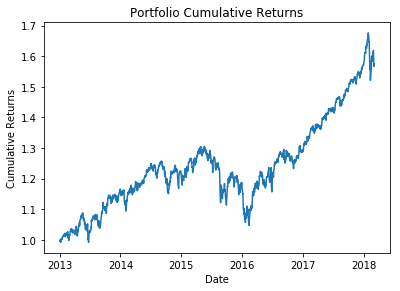

In [44]:
#plot portfolios cumulative returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();